In [3]:
import requests
import pandas as pd
import numpy as np 
import json
from pandas.io.json import json_normalize

# Dados do Governo da Republica Federativa do BRASIL

# Correspondentes no país

O arquivo disponibilizado apresenta os dados mais atuais dos pontos de atendimento dos correspondentes, por instituição financeira e por município, com a identificação dos tipos de serviços prestados, conforme descrito na Resolução 3.954.

Aviso Legal: o teor das informações é de responsabilidade da respectiva instituição/empresa, de acordo com a regulamentação em vigor - ver mais: https://dadosabertos.bcb.gov.br/dataset/correspondentes


Referência bibliográfica: https://fernandamelhem.jusbrasil.com.br/artigos/315457885/correspondentes-bancarios

# Analise Exploratoria - EDA

URL utilizada referente a API consumida

In [6]:
#cUrl = "https://olinda.bcb.gov.br/olinda/servico/Informes_Correspondentes/versao/v1/odata/Correspondentes?$top=100&$format=json&$select=CnpjContratante,NomeContratante,CnpjCorrespondente,NomeCorrespondente,Tipo,Ordem,MunicipioIBGE,Municipio,UF,ServicosCorrespondentes,Posicao"
#Retornando maximo de 1 bilhão de registros. 
cUrl = "https://olinda.bcb.gov.br/olinda/servico/Informes_Correspondentes/versao/v1/odata/Correspondentes?$top=10000&$format=json"

Extração dos dados consumindo a API;
Trabsformação dos dados capturados em um DataSet
Demonstração do DataSet criado

In [7]:
dados = pd.read_json(cUrl)
df = pd.DataFrame(dados) 
df.head()

,@odata.context,value
0,https://was-p.bcnet.bcb.gov.br/olinda/servico/...,"{'CnpjContratante': '45441789', 'NomeContratan..."
1,https://was-p.bcnet.bcb.gov.br/olinda/servico/...,"{'CnpjContratante': '45441789', 'NomeContratan..."
2,https://was-p.bcnet.bcb.gov.br/olinda/servico/...,"{'CnpjContratante': '45441789', 'NomeContratan..."
3,https://was-p.bcnet.bcb.gov.br/olinda/servico/...,"{'CnpjContratante': '45441789', 'NomeContratan..."
4,https://was-p.bcnet.bcb.gov.br/olinda/servico/...,"{'CnpjContratante': '36321990', 'NomeContratan..."


 Normalizando o campo value(composto por colunas e linhas referentes aos dados dos correspondentes)

In [8]:
dfnew = (json_normalize(df.value))
dfnew.head()

,CnpjContratante,NomeContratante,CnpjCorrespondente,NomeCorrespondente,Tipo,Ordem,MunicipioIBGE,Municipio,UF,ServicosCorrespondentes,Posicao
0,45441789,ADMINISTRADORA DE CONSORCIO NACIONAL HONDA LTDA,25134887,H MOTOS CARIOCA LTDA,Sede,I00001,3303302,NITEROI,RJ,Inc. V,31/10/2019
1,45441789,ADMINISTRADORA DE CONSORCIO NACIONAL HONDA LTDA,25134887,H MOTOS CARIOCA LTDA,Filial,I00002,3304904,SAO GONCALO,RJ,Inc. V,31/10/2019
2,45441789,ADMINISTRADORA DE CONSORCIO NACIONAL HONDA LTDA,26108857,PAU BRASIL BAHIA COMERCIO DE MOTOS LTDA,Sede,I00001,2918407,JUAZEIRO,BA,Inc. V,31/10/2019
3,45441789,ADMINISTRADORA DE CONSORCIO NACIONAL HONDA LTDA,26105548,PAU BRASIL PERNAMBUCO COMERCIO DE MOTOS LTDA,Sede,I00001,2611101,PETROLINA,PE,Inc. V,31/10/2019
4,36321990,"AGORACRED S/A SOCIEDADE DE CRÉDITO, FINANCIAME...",02911625,5 IRMAOS MOVEIS LTDA,Sede,I00001,3205002,SERRA,ES,"Inc. III, Inc. V, Inc. VIII",31/10/2019


Criando compo link com os dados da coluna @odata.context

In [9]:
dfnew['urlserv'] = df['@odata.context'] 
dfnew.head()

,CnpjContratante,NomeContratante,CnpjCorrespondente,NomeCorrespondente,Tipo,Ordem,MunicipioIBGE,Municipio,UF,ServicosCorrespondentes,Posicao,urlserv
0,45441789,ADMINISTRADORA DE CONSORCIO NACIONAL HONDA LTDA,25134887,H MOTOS CARIOCA LTDA,Sede,I00001,3303302,NITEROI,RJ,Inc. V,31/10/2019,https://was-p.bcnet.bcb.gov.br/olinda/servico/...
1,45441789,ADMINISTRADORA DE CONSORCIO NACIONAL HONDA LTDA,25134887,H MOTOS CARIOCA LTDA,Filial,I00002,3304904,SAO GONCALO,RJ,Inc. V,31/10/2019,https://was-p.bcnet.bcb.gov.br/olinda/servico/...
2,45441789,ADMINISTRADORA DE CONSORCIO NACIONAL HONDA LTDA,26108857,PAU BRASIL BAHIA COMERCIO DE MOTOS LTDA,Sede,I00001,2918407,JUAZEIRO,BA,Inc. V,31/10/2019,https://was-p.bcnet.bcb.gov.br/olinda/servico/...
3,45441789,ADMINISTRADORA DE CONSORCIO NACIONAL HONDA LTDA,26105548,PAU BRASIL PERNAMBUCO COMERCIO DE MOTOS LTDA,Sede,I00001,2611101,PETROLINA,PE,Inc. V,31/10/2019,https://was-p.bcnet.bcb.gov.br/olinda/servico/...
4,36321990,"AGORACRED S/A SOCIEDADE DE CRÉDITO, FINANCIAME...",02911625,5 IRMAOS MOVEIS LTDA,Sede,I00001,3205002,SERRA,ES,"Inc. III, Inc. V, Inc. VIII",31/10/2019,https://was-p.bcnet.bcb.gov.br/olinda/servico/...


Tamanho do DataSet

In [10]:
dfnew.shape

(10000, 12)

In [11]:
dfnew.columns

Index(['CnpjContratante', 'NomeContratante', 'CnpjCorrespondente',
       'NomeCorrespondente', 'Tipo', 'Ordem', 'MunicipioIBGE', 'Municipio',
       'UF', 'ServicosCorrespondentes', 'Posicao', 'urlserv'],
      dtype='object')

In [12]:
dfnew.dtypes

CnpjContratante            object
NomeContratante            object
CnpjCorrespondente         object
NomeCorrespondente         object
Tipo                       object
Ordem                      object
MunicipioIBGE              object
Municipio                  object
UF                         object
ServicosCorrespondentes    object
Posicao                    object
urlserv                    object
dtype: object

In [13]:
dfnew.describe

<bound method NDFrame.describe of      CnpjContratante                                    NomeContratante  \
0           45441789    ADMINISTRADORA DE CONSORCIO NACIONAL HONDA LTDA   
1           45441789    ADMINISTRADORA DE CONSORCIO NACIONAL HONDA LTDA   
2           45441789    ADMINISTRADORA DE CONSORCIO NACIONAL HONDA LTDA   
3           45441789    ADMINISTRADORA DE CONSORCIO NACIONAL HONDA LTDA   
4           36321990  AGORACRED S/A SOCIEDADE DE CRÉDITO, FINANCIAME...   
...              ...                                                ...   
9995        07707650  AYMORÉ CRÉDITO, FINANCIAMENTO E INVESTIMENTO S.A.   
9996        07707650  AYMORÉ CRÉDITO, FINANCIAMENTO E INVESTIMENTO S.A.   
9997        07707650  AYMORÉ CRÉDITO, FINANCIAMENTO E INVESTIMENTO S.A.   
9998        07707650  AYMORÉ CRÉDITO, FINANCIAMENTO E INVESTIMENTO S.A.   
9999        07707650  AYMORÉ CRÉDITO, FINANCIAMENTO E INVESTIMENTO S.A.   

     CnpjCorrespondente                            NomeCorrespond

In [14]:
dfnew.count()

CnpjContratante            10000
NomeContratante            10000
CnpjCorrespondente         10000
NomeCorrespondente         10000
Tipo                       10000
Ordem                      10000
MunicipioIBGE               9984
Municipio                  10000
UF                         10000
ServicosCorrespondentes    10000
Posicao                    10000
urlserv                    10000
dtype: int64

In [15]:
dfnew.nunique()

CnpjContratante               6
NomeContratante               6
CnpjCorrespondente         8402
NomeCorrespondente         8349
Tipo                          3
Ordem                       106
MunicipioIBGE              1090
Municipio                  1084
UF                           27
ServicosCorrespondentes       4
Posicao                       1
urlserv                       1
dtype: int64

In [16]:
dfnew["Tipo"].value_counts()

Sede       8522
Filial     1464
Agência      14
Name: Tipo, dtype: int64

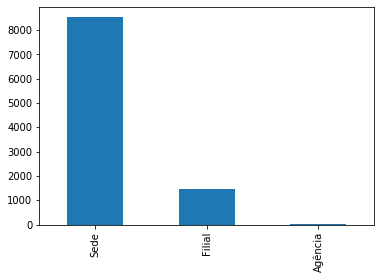

In [19]:
dfnew["Tipo"].value_counts().plot.bar()

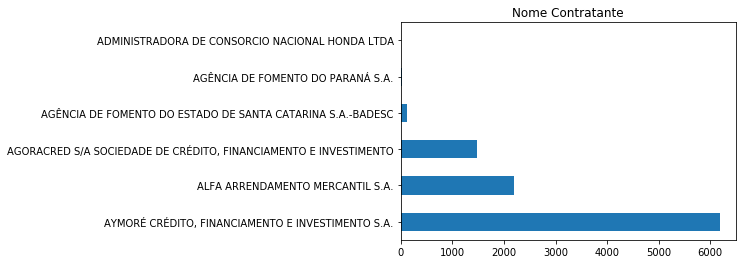

In [20]:
dfnew["NomeContratante"].value_counts().plot.barh(title = 'Nome Contratante')

In [21]:
dfnew["UF"].value_counts(normalize=True)

SP    0.3274
ES    0.1156
MG    0.0890
PR    0.0811
SC    0.0780
RS    0.0594
BA    0.0537
RJ    0.0455
DF    0.0227
GO    0.0200
PE    0.0155
CE    0.0142
MT    0.0132
MS    0.0113
RN    0.0102
PB    0.0091
PA    0.0067
MA    0.0047
PI    0.0044
AL    0.0040
AM    0.0040
SE    0.0036
RO    0.0025
TO    0.0016
AC    0.0012
AP    0.0010
RR    0.0004
Name: UF, dtype: float64

In [32]:
import folium
from folium.plugins import MarkerCluster

mapa = folium.Map(location=[45.523, -122.675],width=750, height=500)
#folium.Marker([-19.9166813,-43.9344931]).add_to(mapa)
mapa

In [23]:
dfnew["UF"].value_counts().plot.map()

AttributeError: 'PlotAccessor' object has no attribute 'map'

In [ ]:
dfnew["Municipio"].value_counts()

In [ ]:
dfnew.sort_values(by=["Tipo","ServicosCorrespondentes","Ordem","UF"])
dfnew()